***Анализ гипотез интернет-магазина для увеличения выручки***

Необходимо приоритезировать гипотезы и провести А/В тестирование

**Цель исследования:**

1) приоритезировать гипотезы методами RICE и ICE ,

2) построить графики кумулятивной выручки, среднего чека, количества заказов, стоимостей заказов;

3) посчитать стат.значимость,

4) сделать выводы по всем графикам и подвести итоги тестирования

**Ход исследования:** Данные получены из файлов: /datasets/hypothesis.csv, /datasets/orders.csv, /datasets/visitors.csv.

Для начала я использую фреймворки RICE и ICE для приоритизации гипотез и покажу, изменился ли приоритет в зависимости от метода. Далее, используя готовые результаты А/В теста я проанализирую несколько кумулятивных показателей, таких как выручка, средний чек, кол-во заказов, определю стат.значимость и приму решение по результатам теста на предмет того,  успешен ли бы тест и победила ли одна из групп.

Подробные шаги прописаны ниже в проекте

### Часть 1. Приоритизация гипотез.

#### Загрузка данных и общая инфо

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv',  sep=',')
pd.options.display.max_colwidth = 1
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Данные выглядят готовыми к работе: нет пропусков, нет дубликатов (т.к. всего 9 гипотез и они все разные, можно убедиться визуально), внешний вид названий колонок меня устраивает.

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датафреймах orders и visitors тип данных колонки с датой не соответствует дате, приведу к нужному типу и удалю очевидные дубликаты через функцию prep. 

In [5]:
def prep(df):
    df = df.drop_duplicates()
    df['date'] = pd.to_datetime(df['date'])
    
    return df

In [6]:
orders = prep(orders)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 56.1+ KB


In [7]:
visitors = prep(visitors)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


Теперь данные выглядят готовыми к работе: нет пропусков, нет дубликатов, внешний вид названий колонок меня устраивает. Переходим к приоритезации.

In [8]:
check=orders[['group', 'visitorId']].duplicated().reset_index()
check.columns = ['index', 'dupl']
check = check.query('dupl==True')
print("Кол-во пользователей, одновременно в двух группах:", check.shape[0])

Кол-во пользователей, одновременно в двух группах: 108


In [9]:
print('{0:.2%}'.format(check.shape[0]/orders.shape[0]))

9.02%


In [10]:
x = orders.pivot_table(index='visitorId', aggfunc={'group':'nunique'}).query('group>1').reset_index()
x.head()

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2


In [11]:
print("Кол-во пользователей, одновременно в двух группах:", x.shape[0])
print('{0:.2%}'.format(x.shape[0]/orders.shape[0]))

Кол-во пользователей, одновременно в двух группах: 58
4.85%


Таких пользователей 58 шт, которые одновременно находятся в двух группах, и составляют всего около 5% популяции.

Коллегам, которые проводили А/В тест, следует более внимательно подходить к распределению пользователей по группам и заносить результаты в таблицу.

#### фреймворк ICE

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [12]:
hypothesis['ICE'] = round(hypothesis['Impact']* hypothesis['Confidence'] / hypothesis['Efforts'], 3)
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


Наиболее перспективные гипотезы по методу ICE - это 8, 0, 7.

#### фреймворк RICE

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [13]:
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'],3)
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


Наиболее перспективные гипотезы по методу RICE - это 7, 2, 0 и 6 (последние делят вместе 3е место, т.к. обе набрали по 40 очков)

**Вывод:** как изменилась приоритизация гипотез при применении RICE вместо ICE и почему?

При методе RICE на первое место вышла гипотеза 7, которая при методе ICE занимала только 3 место, при этом добавилась в ТОП гипотеза 2 и 6, которые при первом методе набрали почти минимальное кол-во баллов.

Т.к. метод RICE является более подробным, т.к. еще учитывает и степень охвата пользователей (в отличие от ICE), которых коснутся изменения, то считаю, что стоит попробовать тестирование гипотез 7, 2, 0 и 6.


### Часть 2. Анализ A/B-теста

#### Кумулятивная выручка по группам

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

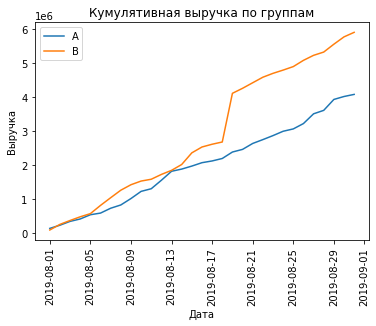

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation='vertical')
plt.legend() 
plt.show()


График кумулятивной выручки показывает, что выручка группы В значительно выше, чем по группе А. Хотя, при этом, так же у группы В наблюдается резкий скачок между 21 и 17 августа, вероятно, резко выросло число заказов, либо были созданы очень дорогие заказы, в то время как по группе А выручка растет стабильно и плавно от даты к дате. Проверку данных на наличие аномальных значений выполним далее в работе.

#### Кумулятивный средний чек по группам

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

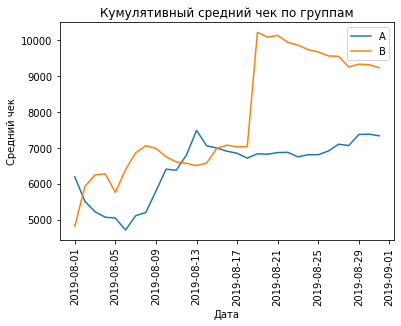

In [15]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation='vertical')
plt.legend() 
plt.show()


График кумулятивного среднего чека так же доказывает, что в группе В произошел какой-то резкий скачок по заказам- вероятно, слишком дорогой заказ был оформлен. Средние чекипо группе А тоже имеют аномальное падение в начальных числах августа, затем к концу анализируемого периода стабилизируется.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

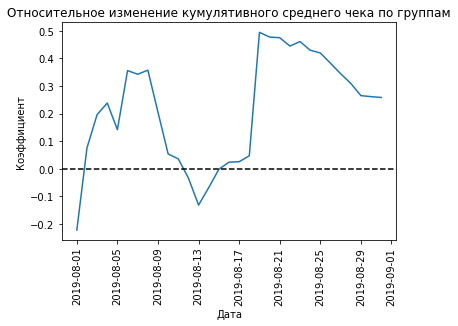

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.ylabel('Коэффициент')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека по группам')
plt.xticks(rotation='vertical')

plt.show()

Такой график нам показывает на сколько сильно отличается средний чек между группами от даты к дате. Есть 2 аномальных всплеска 5 и 17 августа, вероятно, именно в эти даты все-таки были совершены очень дорогие/ либо очень много заказов, что показывали нам и все предыдущие графики. Значит, аномальные выбросы все-таки есть и мы рассмотрим их дальше.

#### Кумулятивное среднее количество заказов на посетителя по группам

Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

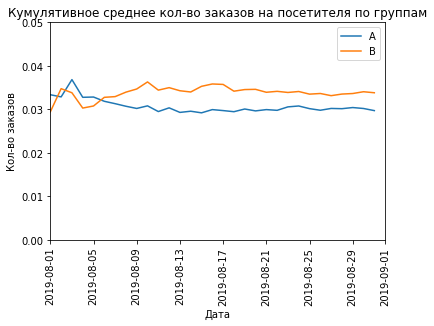

In [17]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Кол-во заказов')
plt.xlabel('Дата')
plt.title('Кумулятивное среднее кол-во заказов на посетителя по группам')
plt.xticks(rotation='vertical')
plt.legend() 
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()


В первые 5 дней августа кол-во заказов на посетителя было близко у групп А и В, затем группа В вырвалась вперед, а группа А одновременно с этим немного просела, и после этого скачка линии среднего кол-ва заказов стабилизировались у обеих групп относительно друг друга.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

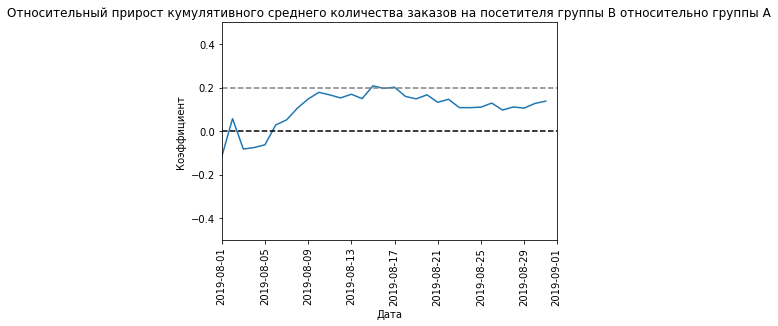

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.ylabel('Коэффициент')
plt.xlabel('Дата')
plt.title("Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.xticks(rotation='vertical')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.show()

В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд и продолжает держать лидирующую позицию на уровне 20% по сравнению с группой А.

#### Количество заказов по пользователям

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

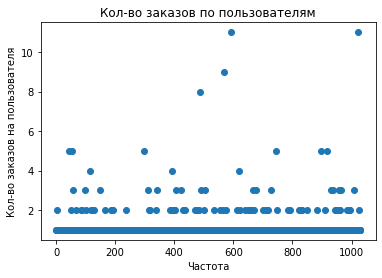

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.ylabel('Кол-во заказов на пользователя')
plt.xlabel('Частота')
plt.title("Кол-во заказов по пользователям")

plt.show()

Точечный график нам четко показывает, что больше всего пользователей, которые заказывали в среднем по 1 заказу, максимум по 2.

А пользователей с заказом более 2 становится меньше с увеличением кол-ва заказов. Так, можно предположить, что пользователи более чем с 4-5 заказами - аномальные выбросы, которые скорее всего мы отбросим далее после анализа.

#### 95-й и 99-й перцентили количества заказов на пользователя

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [20]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


В итоге, 10% пользователей заказывали более 1 раза, 5% пользователей совершили более 2ух заказов, и 1% пользователей более 4 заказов.

На практике принято отсеивать от 1% до 5% наблюдений с крайними значениями, поэтому, будем отсеивать пользователей, которые совершили более, чем 2 заказа ( т.е. уберем не более 5% от наших данных, что допустимо).

#### Стоимость заказов

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

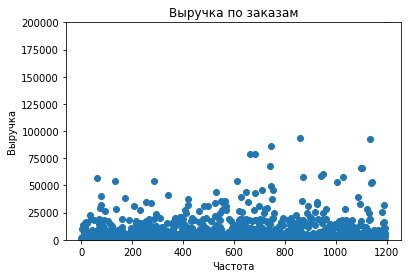

In [21]:
x_values_1 = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values_1,orders['revenue'])

plt.ylabel('Выручка')
plt.xlabel('Частота')
plt.title("Выручка по заказам")
plt.ylim(0, 200000)

plt.show()

Точечный график нам четко показывает, что больше заказов оформлено было на сумму до 200 тр.

Так, можно предположить, что заказы стоимостью выше чем где-то 100 тр (насколько позволяет оценить такой график визуально) - аномальные выбросы, которые скорее всего мы отбросим далее после более точного анализа.

#### 95-й и 99-й перцентили стоимости заказов

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [22]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


В итоге, 10% заказов оформлено по стоимости выше 18 168 руб, 5% заказов свыше 28 000 руб, и 1% заказов дороже 58 233 руб.

На практике принято отсеивать от 1% до 5% наблюдений с крайними значениями. И, так как между 95 и 99 процентилями слишком большой разбег, немного округлю наше пороговое значение до 30 000 руб. Поэтому, будем отсеивать заказы стоимость выше чем 30 000 руб  (т.е. уберем не более 5% от наших данных, что допустимо).

#### Стат. значимость различий в среднем кол-ве заказов на посетителя между группами (сырые)

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


Нулевая гипотеза: различий в среднем кол-ве заказов на посетителя между группами  нет. 

Альтернативная гипотеза: различия есть. 
    
Критический уровень статистической значимости по умолчанию принимаем как 0.05 - самый распространенный уровень, который принимают в тестах
    
Тестировать будем при помощи непараметрического метода st.mannwhitneyu()

</div>

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [24]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [25]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [27]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                          len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                     len(ordersByUsersB['orders'])), name='orders')],axis=0)


print("p-value составил: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
      
print("Относительный прирост составил: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/
                       (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))
      

p-value составил: 0.017
Относительный прирост составил: 0.138


Первое число — p-value = 0.017, значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем. Различия есть

А относительный прирост среднего кол-ва заказов группы В к кол-ву группы А составляет 13,8%.

#### Стат. значимость различий в среднем чеке заказа между группами (сырые)

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


Нулевая гипотеза: различий в среднем чеке заказа между группами нет. 

Альтернативная гипотеза: различия есть. 
    
Критический уровень статистической значимости по умолчанию принимаем как 0.05 - самый распространенный уровень, который принимают в тестах
    
Тестировать будем при помощи непараметрического метода st.mannwhitneyu()

</div>

In [28]:
print('p-value составил: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост составил: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value составил: 0.729
Относительный прирост составил: 0.259


P-value (0.729) значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Хотя, средний чек группы B значительно выше среднего чека группы A (почти на 26%)

#### Стат. значимость различий в среднем кол-ве заказов на посетителя между группами (чистые)

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


Нулевая гипотеза: различий в среднем кол-ве заказов на посетителя между группами нет. 

Альтернативная гипотеза: различия есть. 
    
Критический уровень статистической значимости по умолчанию принимаем как 0.05 - самый распространенный уровень, который принимают в тестах
    
Тестировать будем при помощи непараметрического метода st.mannwhitneyu()

</div>

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value составил: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост составил: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value составил: 0.01334
Относительный прирост составил: 0.172


In [31]:
print("Кол-во аномальных пользователей:", abnormalUsers.shape[0]) 

print('{0:.2%}'.format(abnormalUsers.shape[0] / orders.shape[0]))

Кол-во аномальных пользователей: 68
5.68%



Аномальные пользователи составили 68 шт, или чуть более 5% -  их отсеивание не слишком критично, т.к. маленькая доля от популяции

</div>

Результат по чистым данным так же показывает , что нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем. Различия есть

Показатель группы В все так же выше группы А - на 17%.

#### Стат. значимость различий в среднем чеке заказа между группами (чистые)

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


Нулевая гипотеза: различий в среднем чеке заказа между группами нет. 

Альтернативная гипотеза: различия есть. 
    
Критический уровень статистической значимости по умолчанию принимаем как 0.05 - самый распространенный уровень, который принимают в тестах
    
Тестировать будем при помощи непараметрического метода st.mannwhitneyu()

</div>

In [32]:
print(
    'P-value составил: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост составил: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value составил: 0.720
Относительный прирост составил: -0.023


P-value (0.729) значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет - считаем, что различий нет. Это показывает и второй наш показатель - разница между чеками сократилась - очищенные данные показывают, что чек группы В немного ниже стал, чем у группы А.

#### Результаты А/В теста

Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Результаты у нас следующие:

1) Статистически значимое различие по среднему количеству заказов между группами есть и по «сырым», и по данным после фильтрации аномалий;

2) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

3) График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению: группа В продолжает держать лидирующую позицию на уровне 20% по сравнению с группой А;

4) График различия среднего чека говорит о том, что результаты группы B намного выше, чем у группы А и почти стабильно (было одно понижение в середине августа)

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Показатели группы В намного успешнее, чем показатели группы А
    

**Общий вывод:**

**1)** ***Саммэри по данным***:

- исправила тип данных в колонках
- проверила данные на наличие пропусков
- проверила данные на наличие дубликатов

Благодарю за качественно подготовленные данные.

**2)** ***Исследование***:
 - проанализировала имеющиеся гипотезы методами RICE и ICE. Т.к. метод RICE является более подробным, то считаю, что стоит попробовать тестирование гипотез 7, 2, 0 и 6.
 - визуализировала данные, которые показали: кумулятивна явыручка, средний чек, среднее кол-во заказов на покупателя - выше у группы В
 - определила аномальные значения: кол-во заказов более 2 и сумма заказов более 30 000 руб - в дальнейшем очищаю данные от них
 - результаты А/В теста показали, что группа В победила, т.к. среднее кол-во закзаов и средний чек намного выше (посмотрели по графикам)
 
 Таким образом, считаю, что стоит попробовать тестирование гипотез 7, 2, 0 и 6. И принять А/В тест успешным с победой группы В.
 
